# 第3章 Pytorch 基本开发步骤——用逻辑回归拟合二维数据

In [1]:
# P20 3.1 实例1：从一组看似混乱的数据中找出规律
# 数据集生成
#load the required library
import sklearn.datasets
import torch
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


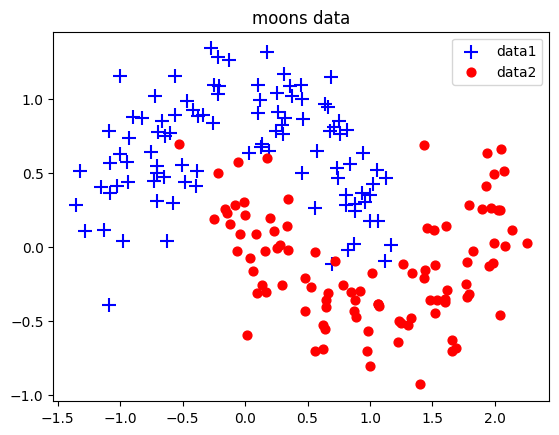

In [2]:
np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise=0.2)
# X为数据的二维特征，y为标签属性

arg = np.squeeze(np.argwhere(Y==0), axis = 1) #获取第1组索引
# np.squeeze 将其合并为一行向量
arg2 = np.squeeze(np.argwhere(Y==1), axis = 1) #获取第二组索引

plt.title("moons data")
plt.scatter(X[arg,0], X[arg, 1], s=100, c='b',marker='+',label='data1')
plt.scatter(X[arg2,0],X[arg2,1],s=40,c='r',marker='o',label='data2')
plt.legend()
plt.show()

In [3]:
# 定义网络模型 LogicNet
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
class LogicNet(nn.Module): ##继承nn.Module类，构建网络模型
    def __init__(self,inputdim,hiddendim,outputdim):
        super(LogicNet,self).__init__()
        self.Linear1 = nn.Linear(inputdim,hiddendim) #定义全连接层
        self.Linear2 = nn.Linear(hiddendim, outputdim) #定义全连接层
        self.criterion = nn.CrossEntropyLoss() #定义交叉熵函数
    def forward(self, x):
        x = self.Linear1(x) #输入送入到第一个全连接层
        x = torch.tanh(x) #对第一个全连接层的结果进行非线性变换
        x = self.Linear2(x)
        return x
    def predict(self, x): #模型的预测接口
        pred = torch.softmax(self.forward(x), dim=1)
        return torch.argmax(pred, dim=1)
    def getloss(self,x,y):
        y_pred = self.forward(x)
        loss = self.criterion(y_pred,y)
        return loss      

In [4]:
model = LogicNet(inputdim=2,hiddendim=3,outputdim=2) #模型的最终结果有多少个分类，该参数就设置成多少
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [5]:
#训练模型
xt = torch.from_numpy(X).type(torch.FloatTensor) #将数据转换为张量
yt = torch.from_numpy(Y).type(torch.LongTensor)
epochs = 1000
losses = []
for i in range(epochs):
    loss = model.getloss(xt, yt)
    losses.append(loss.item())
    optimizer.zero_grad() #清空之前的梯度
    loss.backward() #反向传播损失值
    optimizer.step() #更新参数

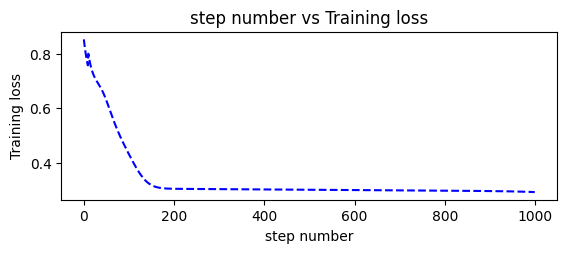

In [6]:
#求移动平均值， 不足w个数当前值作为平均值，之后每w个求该窗口内的平均值
def moving_average(a, w=10):
    if len(a) <w:
       return a[:]
    return [val if idx<w else sum(a[idx-w:idx])/w for idx,val in enumerate(a)]
def plot_losses(losses):
    avgloss = moving_average(losses) #获得损失值的移动平均值
    plt.figure(1)
    plt.subplot(211)
    plt.plot(range(len(avgloss)), avgloss, 'b--')
    plt.xlabel('step number')
    plt.ylabel('Training loss')
    plt.title('step number vs Training loss')
    plt.show()
plot_losses(losses)

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(xt),yt))

0.865


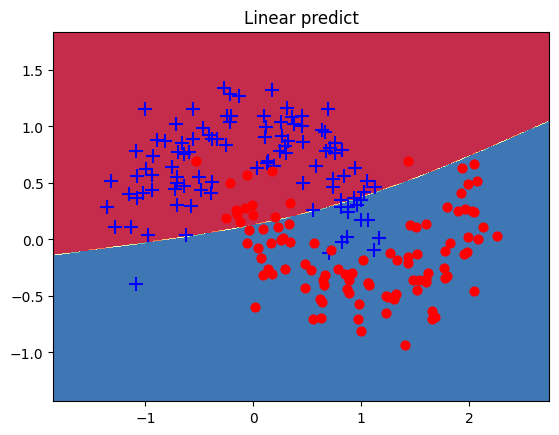

In [8]:
def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

#可视化预测结果模型
def plot_decision_boundary(pred_func, X, Y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    #在坐标系中采用数据，生成网格矩阵，用于输入模型
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #将数据输入并进行预测
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])

 
    Z = Z.reshape(xx.shape)
    #将预测的结果可视化
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.title("Linear predict")
    arg = np.squeeze(np.argwhere(Y==0),axis = 1)
    arg2 = np.squeeze(np.argwhere(Y==1),axis = 1)
    plt.scatter(X[arg,0], X[arg,1], s=100,c='b',marker='+')
    plt.scatter(X[arg2,0], X[arg2,1],s=40, c='r',marker='o')
    plt.show()
plot_decision_boundary(lambda x:predict(x), xt, yt)
    

# 第4章 Pytorch基础  

Pytorch是一个建立在Torch库上的Python包，内部主要是将数据封装成张量（Tensor）（由多个矩阵组成）来进行计算

In [9]:
#将其他类型转化为Tensor类型
import torch
import numpy as np
a = torch.tensor(5)
print(a)

b = np.asarray([4])
a = torch.tensor(b)
print(a)

tensor(5)
tensor([4])


In [10]:
# torch 定义一个张量
import torch

#指定张量的形状（得到的张量是没有初始化的）
a = torch.Tensor(2)
print(a)

b = torch.Tensor(1,2)
print(b)

#指定张量的内容
c = torch.Tensor([2])
print(c)

d = torch.Tensor([1,2])
print(d)

x = torch.rand(2,1) #初始化
print(x)

tensor([1.4013e-43, 0.0000e+00])
tensor([[-1.0658e-29,  3.3350e-41]])
tensor([2.])
tensor([1., 2.])
tensor([[0.1068],
        [0.5159]])


In [11]:
#张量的判断、个数、类型
print(torch.is_tensor(a))
print(torch.numel(a))
print(torch.get_default_dtype())
print(torch.Tensor([1,3]).dtype)
torch.set_default_dtype(torch.float64)
print(torch.get_default_dtype())
torch.set_default_dtype(torch.float32)
print(torch.get_default_dtype())

True
2
torch.float32
torch.float32
torch.float64
torch.float32


In [12]:
#指定类型
a = torch.FloatTensor([4])
print(a.type(torch.IntTensor))

tensor([4], dtype=torch.int32)


In [13]:
#Tensor和numpy数据转换，shape与size的使用
import numpy as np
a =torch.FloatTensor([4])
print(a.numpy())
anp = np.asarray([4]) #定义numpy类型的对象
print(torch.from_numpy(anp))
print(torch.tensor(anp))

a = a.numpy()
anp = torch.tensor(anp)
print(a.shape, a.size)
print(anp.shape, anp.size())

[4.]
tensor([4])
tensor([4])
(1,) 1
torch.Size([1]) torch.Size([1])


In [14]:
#张量与Numpy类型数据相互转换间的陷阱
nparray = np.array([1,1])
x = torch.from_numpy(nparray)
print(x)
nparray+=1
print(x)

nparray = np.array([1,1])
x = torch.from_numpy(nparray)
print(x)
nparray = nparray +1 #系统会额外复制一份内存赋值给nparray变量
print(x)

tensor([1, 1])
tensor([2, 2])
tensor([1, 1])
tensor([1, 1])


In [15]:
#CPU内存转化到GPU中
a = torch.FloatTensor([4])
b = a.cuda()
print(b)


#GPU 内存转化到CPU中
print(b.cpu())

#直接在GPU中定义张量
a = torch.tensor([4],device="cuda")
print(a)

#指定设备
print(a.to("cuda:1"))

tensor([4.], device='cuda:0')
tensor([4.])
tensor([4], device='cuda:0')
tensor([4], device='cuda:1')


In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #当前代码在第1个GPU上运行

In [17]:
print(torch.initial_seed())
torch.manual_seed(2)
print(torch.initial_seed())

4629704869448837849
2


In [18]:
#生成数据
print(torch.randn(2,3))
print(torch.arange(1,10,step=2)) #步长为2
print(torch.linspace(1,9,steps=5)) #均匀地取出5个数值
print(torch.logspace(1,9,steps=5))
print(torch.empty(1,2))#生成未初始化的矩阵

tensor([[ 0.3923, -0.2236, -0.3195],
        [-1.2050,  1.0445, -0.6332]])
tensor([1, 3, 5, 7, 9])
tensor([1., 3., 5., 7., 9.])
tensor([1.0000e+01, 1.0000e+03, 1.0000e+05, 1.0000e+07, 1.0000e+09])
tensor([[-6.5499e-09,  4.4463e-41]])


In [19]:
#pytorch运算
a = torch.FloatTensor([4])

torch.add(a,a,out=c) #指定最后结果为b
print(c)

#自变化运算 即在变量本身基础上做运算
a.add_(c)
print()


tensor([8.])



In [20]:
#张量的reshape方法和torch.reshape结果一致
a = torch.tensor([[1,2],[3,4]])
print(torch.reshape(a,(1,-1)))
print(a.reshape(1,-1))

#去掉值为1的维度
print(torch.squeeze(torch.reshape(a,(1,-1))))

#增加值为1的维度
print(torch.unsqueeze(torch.squeeze(torch.reshape(a,(1,-1))),dim=0))

tensor([[1, 2, 3, 4]])
tensor([[1, 2, 3, 4]])
tensor([1, 2, 3, 4])
tensor([[1, 2, 3, 4]])


In [21]:
#数据不均匀分割
b = torch.tensor([[5,6,7],[2,8,0]])
print(torch.split(b,split_size_or_sections = (1,2), dim=1)) #维度为1的两个部分，第一部分一个元素，第二部分两个元素
print(torch.split(b,split_size_or_sections = 2, dim=1)) #每部分两个元素，最后不足两个元素单独列出来

(tensor([[5],
        [2]]), tensor([[6, 7],
        [8, 0]]))
(tensor([[5, 6],
        [2, 8]]), tensor([[7],
        [0]]))


In [22]:
a = torch.tensor([[1,2],[3,4]])
mask = a.ge(2)
print(mask)  
torch.masked_select(a,mask)

tensor([[False,  True],
        [ True,  True]])


tensor([2, 3, 4])

In [23]:
#根据阈值进行数据截断
a = torch.tensor([[[1,2],[3,4]]])
torch.clamp(a, min=2,max=3)

tensor([[[2, 2],
         [3, 3]]])

In [24]:
#张量维度上的最大最小值
a = torch.tensor([[1,2], [3,4]])
print(torch.max(a, dim=1))
print(torch.min(a, dim=0)) #维度0上其他维度上的最值

torch.return_types.max(
values=tensor([2, 4]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([1, 2]),
indices=tensor([0, 0]))


In [25]:
# Variable对象的 grad_fn属性
from torch.autograd import Variable
x = Variable(torch.ones(2,2), requires_grad=True)
print(x, x.grad_fn) #未计算时Variable对象没有grad_fn属性

m = x+2
print(m.grad_fn)
print(m.grad_fn(x))

tensor([[1., 1.],
        [1., 1.]], requires_grad=True) None
(tensor([[1., 1.],
        [1., 1.]], requires_grad=True), None)


**Pytorch在模型的正向运行过程中记录每个张量的由来，最终在内存中形成一个树形结构，该结构可帮助神经网络在优化参数时进行反向链式求导，当反向链式求导遇到叶子节点时，终止递归循环**

In [26]:
x = torch.ones(2,2,requires_grad=True)
print(x.is_leaf) #自定义的为叶子节点
m = x+2
print(m.is_leaf) #非自定义的不为叶子节点


#利用backward自动求导，该方法会自动调用每个需要求导变量的grad_fn()函数，并将结果放到该变量的grad属性中
f = m.mean()
f.backward() #backward方法一定要在当前变量内容为标量的情况下使用
print(f,x.grad)

True
False
tensor(3., grad_fn=<MeanBackward0>) tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [27]:
model = LogicNet(inputdim =2, hiddendim=3,outputdim=2)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
for sub_module in model.children():
    print(sub_module)

Linear(in_features=2, out_features=3, bias=True)
Linear(in_features=3, out_features=2, bias=True)
CrossEntropyLoss()


In [28]:
for param in model.parameters():
    print(type(param.data),param.size())
#前两条为模型第一层Linear1的参数
#后两条为模型第二个全连接层Linear2的参数

<class 'torch.Tensor'> torch.Size([3, 2])
<class 'torch.Tensor'> torch.Size([3])
<class 'torch.Tensor'> torch.Size([2, 3])
<class 'torch.Tensor'> torch.Size([2])


In [29]:
#获取模型参数的名字 param[0]为名字 param[1]为上述参数一致7
for param in model.named_parameters(): 
    print(type(param[1]),param[1].size(),param[0])

<class 'torch.nn.parameter.Parameter'> torch.Size([3, 2]) Linear1.weight
<class 'torch.nn.parameter.Parameter'> torch.Size([3]) Linear1.bias
<class 'torch.nn.parameter.Parameter'> torch.Size([2, 3]) Linear2.weight
<class 'torch.nn.parameter.Parameter'> torch.Size([2]) Linear2.bias


In [30]:
# #保存模型
# torch.save(model.state_dict(),'./model1.pth')
# #载入模型
# model.load_state_dict(torch.load('./model.pth',map_location={'cuda:1':'cuda:0'}))

In [31]:
import torch
input = torch.autograd.Variable(torch.randn(2))
print(input)
print(nn.Sigmoid()(input))
print(nn.LogSigmoid()(input))
print(torch.tanh(input,out=None))

tensor([0.9537, 0.3547])
tensor([0.7219, 0.5877])
tensor([-0.3259, -0.5315])
tensor([0.7414, 0.3405])


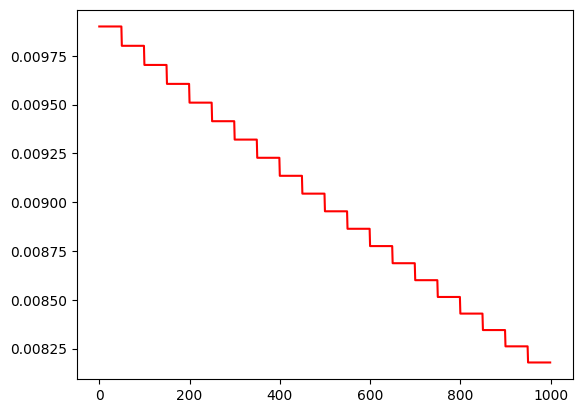

In [32]:
losses = []
lr_list = []
for i in range(epochs):
    loss = model.getloss(xt,yt)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i% 50 == 0:
        for p in optimizer.param_groups:
            p['lr'] *=0.99
    
    lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
plt.plot(range(epochs), lr_list, color ='r')
plt.show()

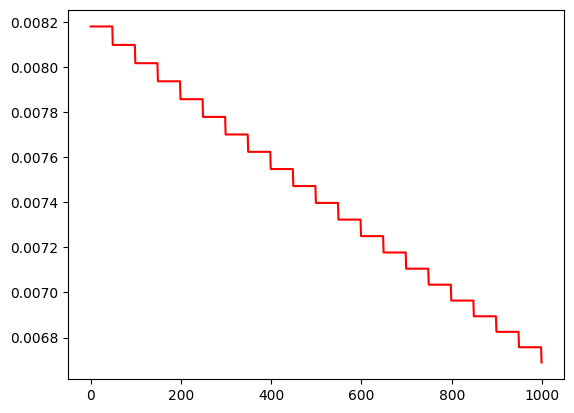

In [33]:
# 退化学习率的接口
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=50,gamma = 0.99)
losses = []
lr_list = []
for i in range(epochs):
    loss = model.getloss(xt,yt)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()    
    lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
plt.plot(range(epochs), lr_list, color ='r')
plt.show()


## 实例 4： 预测泰坦尼克号船上的生存乘客 

In [34]:
import pandas as pd
titanic_data = pd.read_csv("../input/titanic/titanic3.csv")
print(titanic_data.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [35]:
# 将离散数据转为 one-hot 编码
titanic_data = pd.concat([titanic_data,
                         pd.get_dummies(titanic_data['sex']),
                         pd.get_dummies(titanic_data['embarked'],prefix = "embark"),
                         pd.get_dummies(titanic_data['pclass'],prefix="class")],axis = 1)
print(titanic_data.columns)
print(titanic_data['sex'])
print(titanic_data['female'])

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'female',
       'male', 'embark_C', 'embark_Q', 'embark_S', 'class_1', 'class_2',
       'class_3'],
      dtype='object')
0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object
0        True
1       False
2        True
3       False
4        True
        ...  
1304     True
1305     True
1306    False
1307    False
1308    False
Name: female, Length: 1309, dtype: bool


In [36]:
#对Nan值进行过滤填充
titanic_data['age'] = titanic_data['age'].fillna(titanic_data["age"].mean())

In [37]:
titanic_data['fare'] = titanic_data['fare'].fillna(titanic_data['fare'].mean())

In [38]:
#删除无用的列（包含前面使用get_dummy原始列）
titanic_data = titanic_data.drop(['name','ticket','cabin','boat','body','home.dest','sex','embarked','pclass'],axis=1)
print(titanic_data)

      survived        age  sibsp  parch      fare  female   male  embark_C  \
0            1  29.000000      0      0  211.3375    True  False     False   
1            1   0.920000      1      2  151.5500   False   True     False   
2            0   2.000000      1      2  151.5500    True  False     False   
3            0  30.000000      1      2  151.5500   False   True     False   
4            0  25.000000      1      2  151.5500    True  False     False   
...        ...        ...    ...    ...       ...     ...    ...       ...   
1304         0  14.500000      1      0   14.4542    True  False      True   
1305         0  29.881138      1      0   14.4542    True  False      True   
1306         0  26.500000      0      0    7.2250   False   True      True   
1307         0  27.000000      0      0    7.2250   False   True      True   
1308         0  29.000000      0      0    7.8750   False   True     False   

      embark_Q  embark_S  class_1  class_2  class_3  
0        

In [39]:
#分离样本和标签
labels = titanic_data["survived"].to_numpy()
titanic_data = titanic_data.drop(['survived'],axis=1)
print(titanic_data)
data = titanic_data.to_numpy()

            age  sibsp  parch      fare  female   male  embark_C  embark_Q  \
0     29.000000      0      0  211.3375    True  False     False     False   
1      0.920000      1      2  151.5500   False   True     False     False   
2      2.000000      1      2  151.5500    True  False     False     False   
3     30.000000      1      2  151.5500   False   True     False     False   
4     25.000000      1      2  151.5500    True  False     False     False   
...         ...    ...    ...       ...     ...    ...       ...       ...   
1304  14.500000      1      0   14.4542    True  False      True     False   
1305  29.881138      1      0   14.4542    True  False      True     False   
1306  26.500000      0      0    7.2250   False   True      True     False   
1307  27.000000      0      0    7.2250   False   True      True     False   
1308  29.000000      0      0    7.8750   False   True     False     False   

      embark_S  class_1  class_2  class_3  
0         True     

In [40]:
print(titanic_data)

            age  sibsp  parch      fare  female   male  embark_C  embark_Q  \
0     29.000000      0      0  211.3375    True  False     False     False   
1      0.920000      1      2  151.5500   False   True     False     False   
2      2.000000      1      2  151.5500    True  False     False     False   
3     30.000000      1      2  151.5500   False   True     False     False   
4     25.000000      1      2  151.5500    True  False     False     False   
...         ...    ...    ...       ...     ...    ...       ...       ...   
1304  14.500000      1      0   14.4542    True  False      True     False   
1305  29.881138      1      0   14.4542    True  False      True     False   
1306  26.500000      0      0    7.2250   False   True      True     False   
1307  27.000000      0      0    7.2250   False   True      True     False   
1308  29.000000      0      0    7.8750   False   True     False     False   

      embark_S  class_1  class_2  class_3  
0         True     

In [41]:
import numpy as np
np.random.seed(10)
train_indices = np.random.choice(len(labels), int(0.7*len(labels)),replace = False)
test_indices = list(set(range(len(labels))) - set(range(len(train_indices))))

In [42]:
train_features = data[train_indices]
train_labels = labels[train_indices]
test_features = data[test_indices]
test_labels = labels[test_indices]
print(len(labels),len(test_labels))

1309 393


In [43]:
#Mish 激活函数
import torch.nn as nn
class Mish(nn.Module):
    def __init__(self):
        super().__init__()
        print("Mish activation loaded..")
    def forward(self,x):
        x = x *(torch.tanh(nn.Softplus()(x)))
        return x

In [44]:
torch.manual_seed(0) #设置随机种子

Mish activation loaded..
Mish activation loaded..
[[24.0 1 0 ... True False False]
 [28.0 0 0 ... False True False]
 [29.881137667304014 0 0 ... False False True]
 ...
 [29.881137667304014 0 2 ... False False True]
 [29.881137667304014 0 0 ... True False False]
 [29.881137667304014 1 0 ... False False True]]


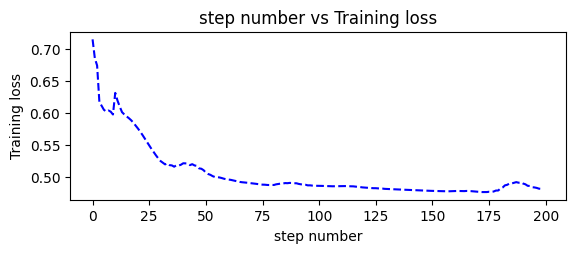

In [45]:
class ThreelinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(12,12)
        self.mish1 = Mish()
        self.linear2 = nn.Linear(12, 8)
        self.mish2 = Mish()
        self.linear3 = nn.Linear(8,2)
        self.softmax = nn.Softmax(dim=1)
        self.criterion = nn.CrossEntropyLoss()
    def forward(self,x):
        lin1_out = self.linear1(x)
        out1 = self.mish1(lin1_out)
        out2 = self.mish2(self.linear2(out1))
        return self.softmax(self.linear3(out2))
    def getloss(self,x,y):
        y_pred = self.forward(x)
        loss = self.criterion(y_pred, y)
        return loss
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')   
net = ThreelinearModel().to(device)

num_epochs = 200
optimizer = torch.optim.Adam(net.parameters(),lr=0.04)
print(train_features)
train_features = train_features.astype(np.float64) 
input_tensor = torch.from_numpy(train_features).type(torch.FloatTensor).to(device)
label_tensor = torch.from_numpy(train_labels).to(device)



losses = []
for epoch in range(num_epochs):
    loss = net.getloss(input_tensor,label_tensor)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #更新参数
    #if epoch % 20 ==0:
        #print('Epoch {}/{} => Loss: {:.2f}'.format(epoch+1, num_epochs, loss.item()))

#torch.save(net.state_dict(),'model/titanic_model.pt')

plot_losses(losses)

In [46]:
#输出训练结果
out_prob = net(input_tensor).cpu().detach().numpy()
out_class = np.argmax(out_prob, axis = 1)
print('Train Accuracy: {:.2f}'.format(sum(train_labels == out_class) /len(train_labels)))


Train Accuracy: 0.82


In [47]:
#测试模型
test_features = test_features.astype(np.float64) 
test_tensor = torch.from_numpy(test_features).type(torch.FloatTensor).to(device)
test_label_tensor = torch.from_numpy(test_labels).to(device)
test_prob = net(test_tensor).cpu().detach().numpy()
test_class =np.argmax(test_prob,axis=1)
print('Test Accuracy: {:.2f}'.format(sum(test_labels == test_class) /len(test_labels)))

Test Accuracy: 0.79
